In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

width = 12
height = 7
plt.rcParams["figure.figsize"] = (width, height)


from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import tflscripts
import json
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn import tree
import pickle

configuration = tflscripts.read_configuration()

In [10]:
df_tested = pd.read_pickle('results_with_accuracy_classified.p')

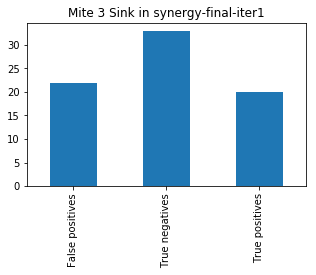

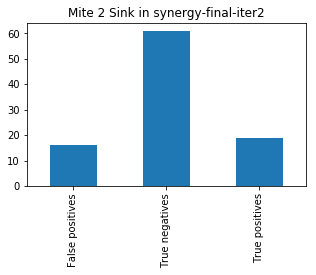

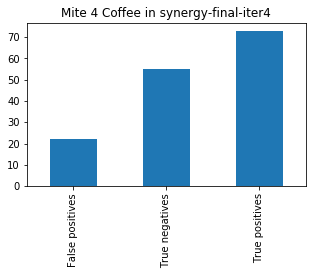

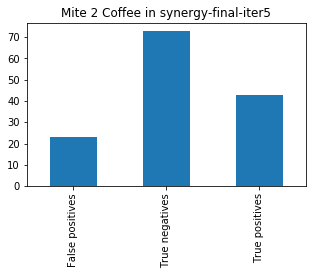

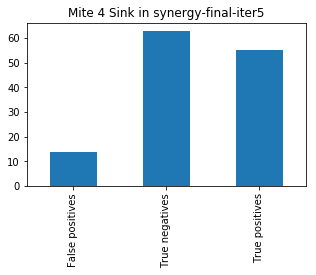

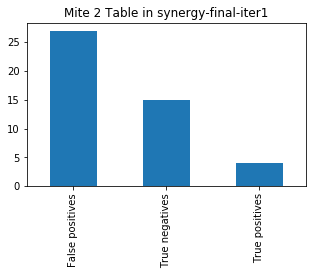

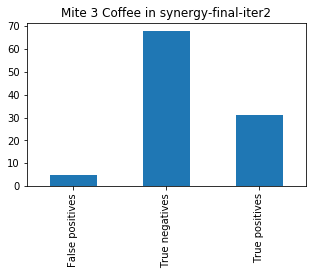

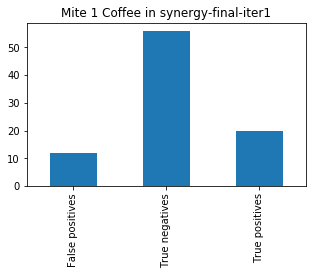

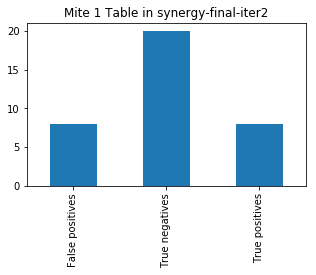

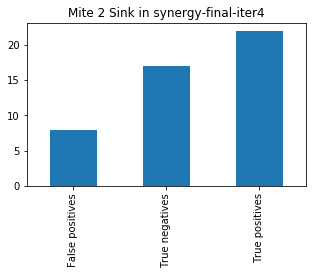

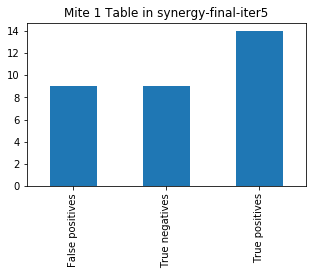

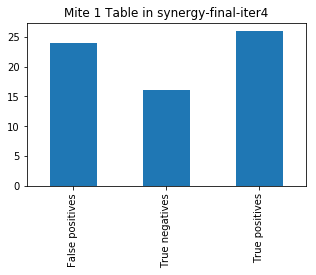

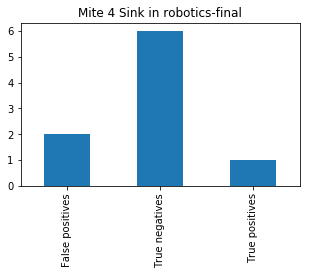

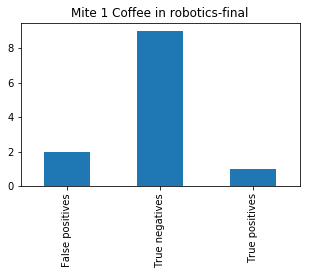

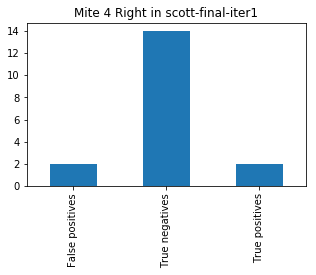

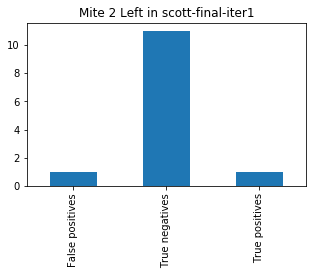

In [11]:
cases = df_tested[['target_device_name', 'target_dataset']].drop_duplicates()
plt.rcParams["figure.figsize"] = (5, 3)

for _, case in cases.iterrows():
    device_name = case['target_device_name']
    dataset = case['target_dataset']
    df_relevant = df_tested.loc[df_tested.target_device_name == device_name]
    df_relevant = df_relevant.loc[df_relevant.target_dataset == dataset]

    good_models = df_relevant.loc[df_relevant.accuracy_bin == 1]
    predicted_models = df_relevant.loc[df_relevant.predictions == 1]
    
    true_positives = good_models.loc[good_models.predictions == 1]
    false_positives = predicted_models.loc[predicted_models.accuracy_bin != 1]
    true_negatives = good_models.loc[good_models.predictions == 0]

    pd.Series({
        'True positives': len(true_positives),
        'False positives': len(false_positives),
        'True negatives': len(true_negatives),
    }).plot.bar()
    plt.title(device_name + ' in ' + dataset)
    plt.show()

synergy-final-iter1 Mite 3 Sink


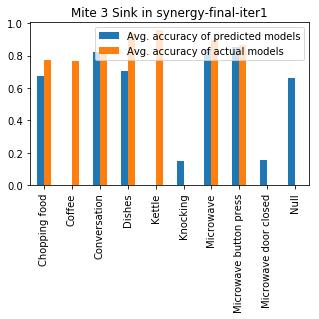

synergy-final-iter2 Mite 2 Sink


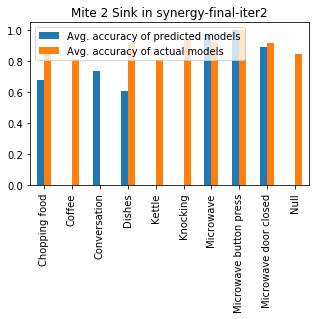

synergy-final-iter4 Mite 4 Coffee


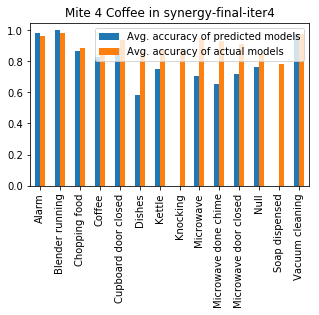

synergy-final-iter5 Mite 2 Coffee


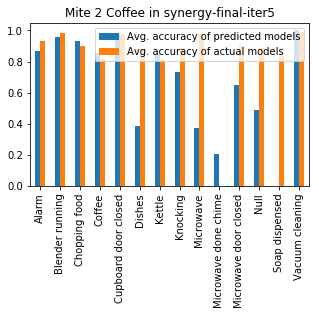

synergy-final-iter5 Mite 4 Sink


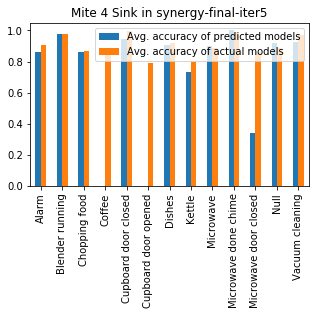

synergy-final-iter1 Mite 2 Table


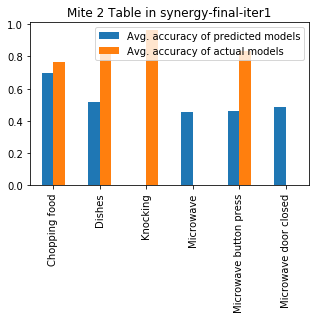

synergy-final-iter2 Mite 3 Coffee


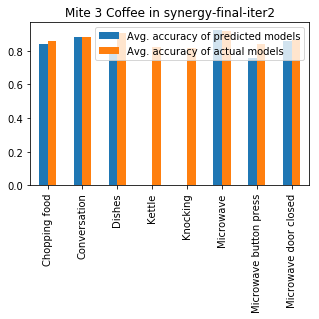

synergy-final-iter1 Mite 1 Coffee


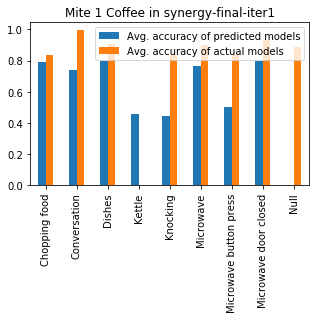

synergy-final-iter2 Mite 1 Table


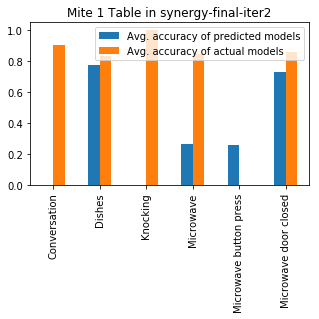

synergy-final-iter4 Mite 2 Sink


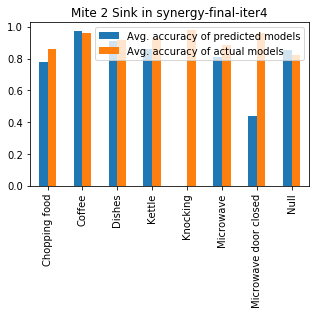

synergy-final-iter5 Mite 1 Table


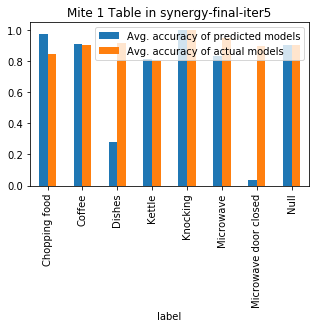

synergy-final-iter4 Mite 1 Table


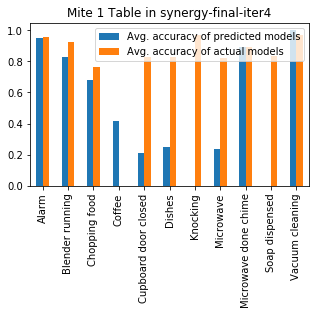

robotics-final Mite 4 Sink


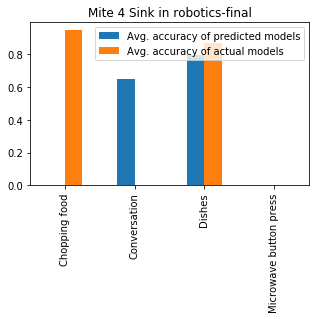

robotics-final Mite 1 Coffee


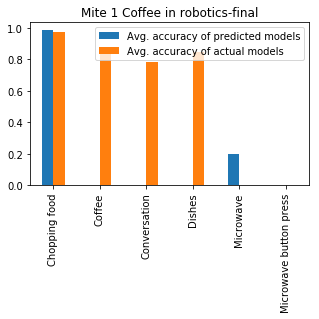

scott-final-iter1 Mite 4 Right


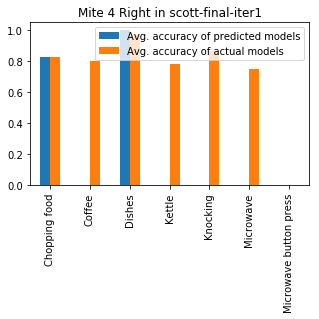

scott-final-iter1 Mite 2 Left


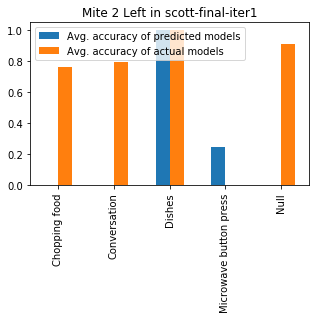

In [12]:
### plt.rcParams["figure.figsize"] = (7, 5)

for _, case in cases.iterrows():
    device_name = case['target_device_name']
    dataset = case['target_dataset']
    print(dataset, device_name)
    df_relevant = df_tested.loc[df_tested.target_device_name == device_name]
    df_relevant = df_relevant.loc[df_relevant.target_dataset == dataset]

    good_models = df_relevant.loc[df_relevant.accuracy_bin == 1]
    predicted_models = df_relevant.loc[df_relevant.predictions == 1]

    predicted_models = predicted_models[['label', 'accuracy_positive']]
    predicted_models = predicted_models.rename(columns={'accuracy_positive': 'Avg. accuracy of predicted models'})
    predicted_models = predicted_models.groupby(['label'])['Avg. accuracy of predicted models'].mean()

    good_models = good_models[['label', 'accuracy_positive']]
    good_models = good_models.rename(columns={'accuracy_positive': 'Avg. accuracy of actual models'})
    good_models = good_models.groupby(['label'])['Avg. accuracy of actual models'].mean()

    pd.concat([predicted_models, good_models], axis=1).plot.bar()

    plt.title(device_name + ' in ' + dataset)
    plt.show()

In [16]:
list(df_relevant.loc[df_relevant.predictions == 2].iterrows())[0][1]

source_dataset                          scott-final-iter1
target_dataset                          scott-final-iter1
source_device                                      Mite 4
target_device                                      Mite 2
source_device_name                           Mite 4 Right
target_device_name                            Mite 2 Left
source_room                                         scott
target_room                                         scott
source_placement                                    Right
target_placement                                     Left
type_of_transfer      Same device type in different place
classifier                                            SVM
label                                              Dishes
features                                              All
accuracy                                         0.993905
accuracy_positive                                0.958678
accuracy_negative                                       1
accuracy_bin  

In [8]:
for _, case in cases.iterrows():
    device_name = case['target_device_name']
    dataset = case['target_dataset']
    print(dataset, device_name)
    df_relevant = df_tested.loc[df_tested.target_device_name == device_name]
    df_relevant = df_relevant.loc[df_relevant.target_dataset == dataset]
    
    print(df_relevant.loc[df_relevant.accuracy_bin == 2][['source_dataset', 'source_device', 'label']].drop_duplicates())
    print(df_relevant.loc[df_relevant.predictions == 2][['source_dataset', 'source_device', 'label']].drop_duplicates())
    
    print('Options', len(df_relevant))
    print('Good options', len(df_relevant.loc[df_relevant.accuracy_bin == 2]))
    print('Good option labels', len(df_relevant.loc[df_relevant.accuracy_bin == 2].label.unique()))
    print(df_relevant.loc[df_relevant.accuracy_bin == 2].label.unique())
    print('Predicted options', len(df_relevant.loc[df_relevant.predictions == 2]))
    print('Predicted option labels', len(df_relevant.loc[df_relevant.predictions == 2].label.unique()))
    print()

synergy-final-iter1 Mite 3 Sink
            source_dataset source_device                   label
181    synergy-final-iter2        Mite 2               Microwave
901    synergy-final-iter2        Mite 2                  Dishes
1381   synergy-final-iter2        Mite 2  Microwave button press
1908   synergy-final-iter2        Mite 3               Microwave
2748   synergy-final-iter2        Mite 3                  Dishes
3058   synergy-final-iter2        Mite 3  Microwave button press
6607   synergy-final-iter5        Mite 2               Microwave
8125   synergy-final-iter5        Mite 4               Microwave
13003  synergy-final-iter1        Mite 2               Microwave
13747  synergy-final-iter1        Mite 2                  Dishes
14203  synergy-final-iter1        Mite 2  Microwave button press
            source_dataset source_device                   label
217    synergy-final-iter2        Mite 2               Microwave
901    synergy-final-iter2        Mite 2                  

actual,0,1,2
predicted,,,
0,553,25,32
1,40,14,12
2,20,17,63


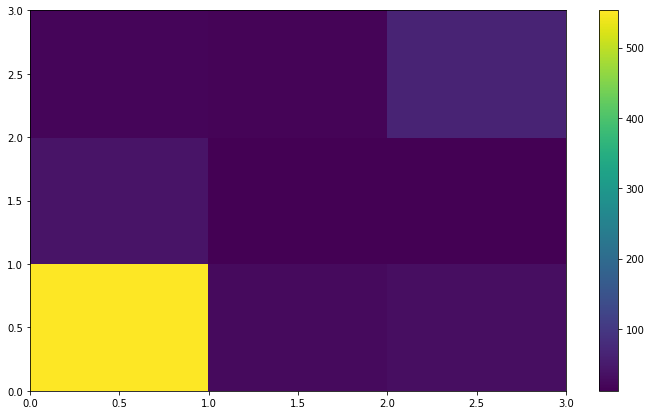

In [16]:
df = pd.DataFrame({'predicted': predicted, 'actual': y_test})
pivoted = df.pivot_table(index='predicted', columns='actual', aggfunc=len, fill_value=0)
plt.pcolor(pivoted)
plt.colorbar()
pivoted

In [9]:
from IPython.display import Image
import pydotplus

clf = ppl.named_steps['clf']

dot_data = tree.export_graphviz(clf, out_file=None,
#                                 feature_names=iris.feature_names,
#                                 class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("decision_tree.pdf")

True